### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4 - SOLUTION</span>


All c++ code is stored into exercize_xx/es_xx.x.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

In [1]:
# Common libs
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### Exercise 04.1
- The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 


1. <span style="color:black">Improve the MD code by enabling the possibility to (re)start reading not only a actual spatial configuration [$\vec{r}(t)$] file but also an old spatial configuration [$\vec{r}(t-dt)$] file.
2. Add the possibility to rescale the velocities  in order to match a desired temperature</span>.

Option in input file: old=1 for a restart from old.0 [$\vec{r}(t-dt)$] and config.0 [$\vec{r}(t)$] and old=0 for a start only from config.0. old.0 is the original config.0, config.0 is generated as the first step from a run started with the original config.0.

### Exercise 04.2
- Take the MD code and include block averaging: 

1. Divide the <font face="Courier">nstep</font> of the simulation into <font face="Courier">nblocks</font>. By exploiting these blocks, code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$, that will be written in new specific output files: ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out, stored into exercize_04/data/es04.2/ folder.

### Exercise 04.3

- Include the calculation of the pressure, $P$, inside your Molecular Dynamics. Istantaneous values, average values and uncertainties are stored into exercize_04/data/es04.3/

### Exercise 04.4

- Equilibrate (5000 step) and perform MD simulations via a Lennard-Jones model of Argon and Krypton using the following values:

|                    	|   Argon  	|  Krypton 	|
|--------------------	|:--------:	|---------:	|
| $\sigma$ [nm]      	|  $0.34$  	|  $0.364$ 	|
| $\epsilon/k_b$ [K] 	|   $120$  	|    $164$ 	|
| $m$ [amu]          	| $30.948$ 	| $83.798$ 	|

for solid, liquid and gas phase:

|           | Solid | Liquid | Gas    |
|-----------|:-----:|-------:|--------|
| $\rho^*$  | $1.1$ |  $0.8$ | $0.05$ |
| $T^*$     | $0.8$ |  $1.1$ |  $1.2$ |
| $r_c$     | $2.2$ |  $2.5$ |  $5.0$ |

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the pressure $P$ and the temperature, $T$ in SI units.

In [72]:
#Conversion to SI units
kb= 1.38e-23
amu = 1.64e-27
istep = 0.0005
nparticle = 108

sigma_argon = 0.34e-9
sigma_krypton = 0.364e-9
energy_argon = 120 * kb
energy_krypton =  164 * kb
mass_argon = 39.948 * amu
mass_krypton = 83.798 * amu

- Total energy for solid, liquid and gas phase

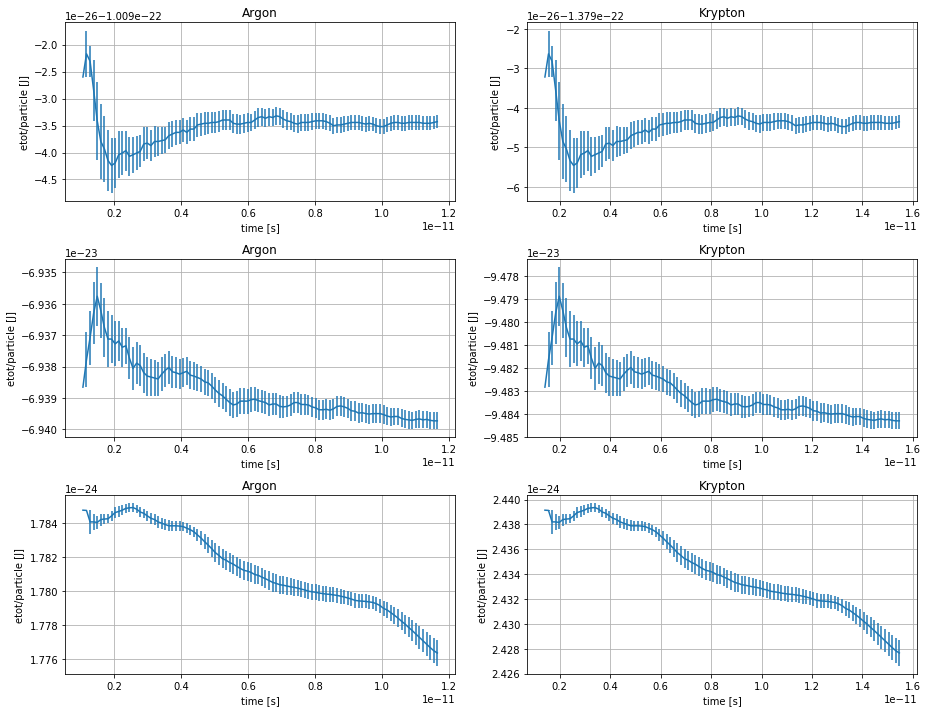

In [87]:
# To read data from file

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.subplot(3,2,2)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.subplot(3,2,3)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.subplot(3,2,4)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.subplot(3,2,5)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.subplot(3,2,6)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_etot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('etot/particle [J]')
plt.grid(True)

plt.tight_layout()
plt.show()


- Potential energy per particle

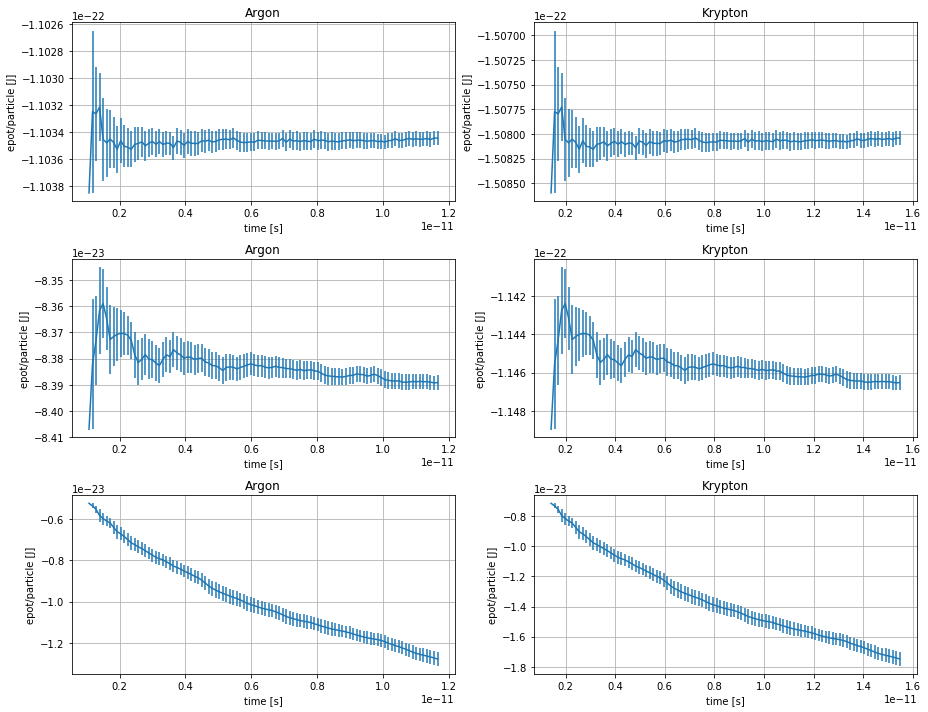

In [88]:
# To read data from file

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.subplot(3,2,2)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.subplot(3,2,3)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.subplot(3,2,4)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.subplot(3,2,5)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.subplot(3,2,6)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_epot.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('epot/particle [J]')
plt.grid(True)

plt.tight_layout()
plt.show()


- Kinetic energy per particle

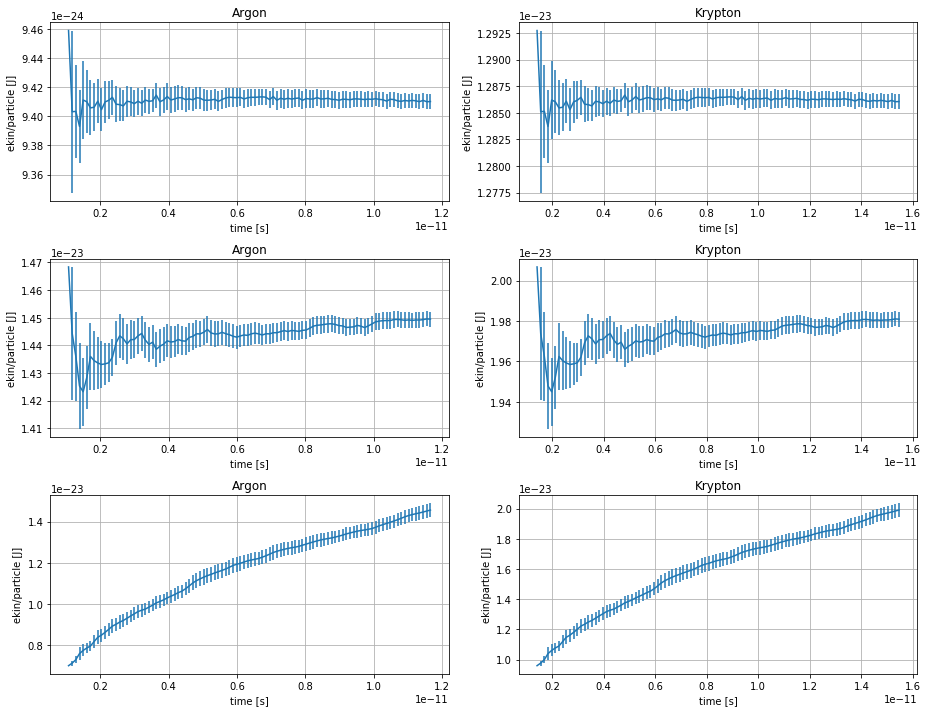

In [89]:
# To read data from file

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.subplot(3,2,2)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.subplot(3,2,3)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.subplot(3,2,4)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.subplot(3,2,5)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/nparticle
err_prog=err_prog*energy_argon/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.subplot(3,2,6)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_ekin.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/nparticle
err_prog=err_prog*energy_krypton/nparticle

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('ekin/particle [J]')
plt.grid(True)

plt.tight_layout()
plt.show()


- Pressure

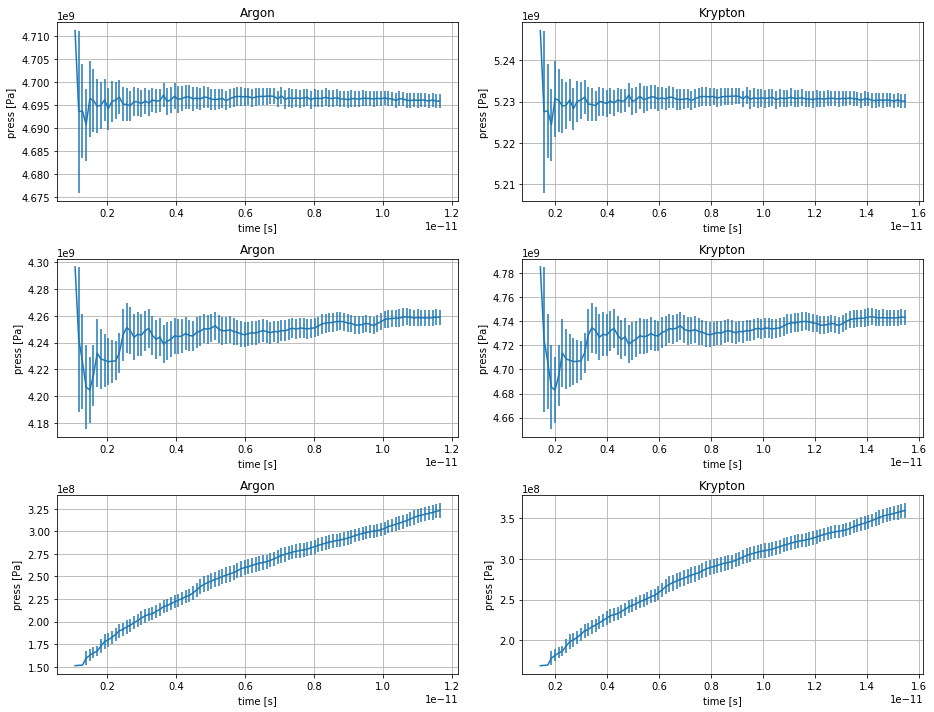

In [90]:
# To read data from file

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/(sigma_argon*sigma_argon*sigma_argon)
err_prog=err_prog*energy_argon/(sigma_argon*sigma_argon*sigma_argon)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.subplot(3,2,2)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)
err_prog=err_prog*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.subplot(3,2,3)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/(sigma_argon*sigma_argon*sigma_argon)
err_prog=err_prog*energy_argon/(sigma_argon*sigma_argon*sigma_argon)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.subplot(3,2,4)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)
err_prog=err_prog*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.subplot(3,2,5)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/(sigma_argon*sigma_argon*sigma_argon)
err_prog=err_prog*energy_argon/(sigma_argon*sigma_argon*sigma_argon)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.subplot(3,2,6)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_press.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)
err_prog=err_prog*energy_krypton/(sigma_krypton*sigma_krypton*sigma_krypton)

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('press [Pa]')
plt.grid(True)

plt.tight_layout()
plt.show()


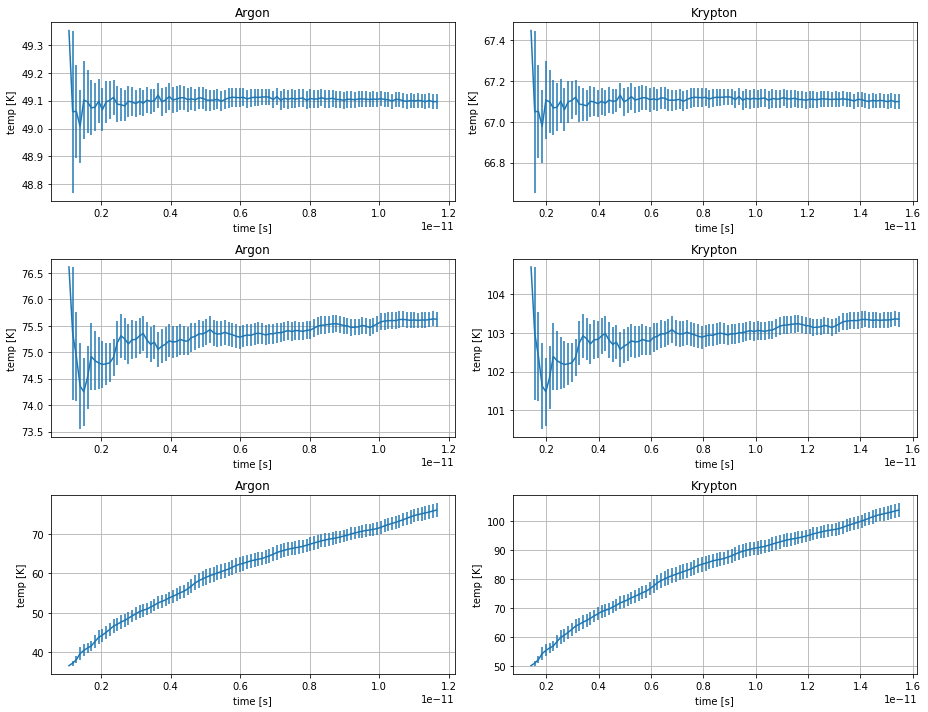

In [91]:
# To read data from file

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/kb
err_prog=err_prog*energy_argon/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.subplot(3,2,2)
x, y, err_prog = np.loadtxt("data/es04.4/solid/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/kb
err_prog=err_prog*energy_krypton/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.subplot(3,2,3)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep
y=y*energy_argon/kb
err_prog=err_prog*energy_argon/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.subplot(3,2,4)
x, y, err_prog = np.loadtxt("data/es04.4/liquid/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/kb
err_prog=err_prog*energy_krypton/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.subplot(3,2,5)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_argon*sigma_argon*sigma_argon/energy_argon)*istep 
y=y*energy_argon/kb
err_prog=err_prog*energy_argon/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Argon")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.subplot(3,2,6)
x, y, err_prog = np.loadtxt("data/es04.4/gas/ave_temp.out", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')

x=x*np.sqrt(mass_krypton*sigma_krypton*sigma_krypton/energy_krypton)*istep 
y=y*energy_krypton/kb
err_prog=err_prog*energy_krypton/kb

plt.errorbar(x,y,yerr=err_prog)
plt.title("Krypton")
plt.xlabel('time [s]')
plt.ylabel('temp [K]')
plt.grid(True)

plt.tight_layout()
plt.show()
